In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

# Exploring the DataSet

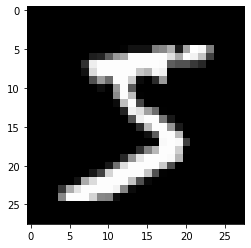

In [3]:
# Select an image from the dataset
img = x_train[0]

# Plot the image
plt.imshow(img, cmap='gray')
plt.show()


In [4]:
print("The shape of x_train.shape is:", x_train.shape)
print("the shape of x_train.shape is:", y_train.shape)



The shape of x_train.shape is: (60000, 28, 28)
the shape of x_train.shape is: (60000,)


## Our data set will have 1000 examples and will be flattened so that each image is a vector:

In [5]:
inputs = x_train.reshape((60000, 28*28))[0:15]
print("the new shape is: " ,inputs.shape)

outputs = y_train[0:15]
print("the new output shape is:" , outputs.shape)

outputs.size
outputs.shape[0]

the new shape is:  (15, 784)
the new output shape is: (15,)


15

## Turn the outputs to a vector with dim (10,1000)

In [6]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.shape[0], Y.max() + 1))
    print(one_hot_Y.shape)
    
    one_hot_Y[np.arange(Y.shape[0]), Y] = 1
    one_hot_Y = one_hot_Y
    return one_hot_Y


outputs = one_hot(outputs)

print( "This is the new shape of the outputs", outputs.shape)
print(" This is how the first elemet of y_train is compared to outputs: \n" ,"This is the outputs:", outputs[0],"\n", "This is the actual output: " , y_train[0])


(15, 10)
This is the new shape of the outputs (15, 10)
 This is how the first elemet of y_train is compared to outputs: 
 This is the outputs: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
 This is the actual output:  5


## Creat the network using Micrograd

In [7]:
model = MLP(784, [16, 36, 10]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784), ReLUNeuron(784)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(36), LinearNeuron(36), LinearNeuron(36), LinearNeuron(36), LinearNeuron(36), LinearNeuron(36), Line

In [48]:
y_pred = list(map(model, inputs))

In [54]:
y_pred

[[Value(data=4898.372201419689, grad=0),
  Value(data=-5743.645522079346, grad=0),
  Value(data=-14728.024039587977, grad=0),
  Value(data=-4581.6763535593445, grad=0),
  Value(data=7119.634018798554, grad=0),
  Value(data=4092.0729307708543, grad=0),
  Value(data=-1766.557587970925, grad=0),
  Value(data=9212.364908135922, grad=0),
  Value(data=-1637.2730385046339, grad=0),
  Value(data=6842.238189310461, grad=0)],
 [Value(data=5307.68668671743, grad=0),
  Value(data=-11109.795422846082, grad=0),
  Value(data=-12483.521659681262, grad=0),
  Value(data=-1523.3819588839995, grad=0),
  Value(data=6369.370805099062, grad=0),
  Value(data=357.83496656249235, grad=0),
  Value(data=-1987.9645747695736, grad=0),
  Value(data=5271.029608975274, grad=0),
  Value(data=-4834.209150154418, grad=0),
  Value(data=5350.610402420383, grad=0)],
 [Value(data=1148.1335043747172, grad=0),
  Value(data=-4991.51519300324, grad=0),
  Value(data=-4881.811046113655, grad=0),
  Value(data=-5098.163864829043, gr

In [51]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(outputs, y_pred))

In [52]:
loss

array([Value(data=231201322.06872958, grad=0),
       Value(data=717812792.0874319, grad=0),
       Value(data=1271450560.0367599, grad=0),
       Value(data=1209315866.6852663, grad=0),
       Value(data=208634692.852913, grad=0),
       Value(data=463346582.359782, grad=0),
       Value(data=127111741.14266758, grad=0),
       Value(data=568754742.0796875, grad=0),
       Value(data=63381599.94168131, grad=0),
       Value(data=581210914.9140416, grad=0)], dtype=object)

In [55]:
for thing in loss:
    thing.backward()

In [58]:
model.layers[1].neurons[4].w[1]

Value(data=0.5501466684718259, grad=-64892715500304.11)

In [11]:
for k in range(100):
        ypred = list(map(model, inputs))
        
        loss = sum((yout - ygt)**2 for ygt, yout in zip(outputs, ypred))


        for p in model.parameters():
            p.grad = 0.0

        for thing in loss:
            thing.backward()

        for p in model.parameters():
            p.data += -0.000001 *p.grad

        print(k, loss)

KeyboardInterrupt: 